In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report

In [26]:
# ==============================================================================
# 1. Load Data & EDA Singkat
# ==============================================================================
print("Langkah 1: Memuat Data dan Pembersihan Awal")
df = pd.read_csv("Breast_Cancer_Wisconsin.csv")

# Menghapus kolom yang tidak relevan ('id') dan kolom kosong ('Unnamed: 32')
df = df.drop(['id', 'Unnamed: 32'], axis=1)

print("\nData Preview (5 Baris Pertama Setelah Pembersihan):")
print(df.head())
print("\n---------------------------------------------------------------------------")
print("ImportError: Missing optional dependency 'tabulate'.  Use pip or conda to install tabulate.")

Langkah 1: Memuat Data dan Pembersihan Awal

Data Preview (5 Baris Pertama Setelah Pembersihan):
  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  ra

In [27]:
# ==============================================================================
# 2. Preprocessing (Encoding & Scaling)
# ==============================================================================
print("\nLangkah 2: Preprocessing Data (Encoding & Scaling)")

# a) Encoding: Menggunakan Label Encoder untuk target biner ('diagnosis')
label_encoder = LabelEncoder()
# 'M' (Malignant/Ganas) -> 1, 'B' (Benign/Jinak) -> 0
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

# Memisahkan Fitur (X) dan Target (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# b) Split Data: Bagi menjadi Training Set (80%) dan Test Set (20%)
# Validation Set akan diambil 20% dari Training Set saat model.fit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# c) Feature Scaling (WAJIB): Menggunakan StandardScaler pada fitur input (X)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

input_dim = X_train_scaled.shape[1]
print(f"Jumlah Fitur Input (input_dim): {input_dim}")


Langkah 2: Preprocessing Data (Encoding & Scaling)
Jumlah Fitur Input (input_dim): 30


In [28]:
# ==============================================================================
# 3. Definisi Model (Arsitektur)
# ==============================================================================
print("\nLangkah 3: Membangun Arsitektur ANN (Keras)")

# Inisialisasi Model Sequential
model = Sequential()

# Input Layer dan Hidden Layer Pertama (Aktivasi ReLU)
model.add(Dense(units=32, activation='relu', input_dim=input_dim))

# Hidden Layer Kedua (Aktivasi ReLU)
model.add(Dense(units=16, activation='relu'))

# Hidden Layer Ketiga (Aktivasi ReLU)
model.add(Dense(units=8, activation='relu'))

# Dropout Layer (untuk mengurangi Overfitting)
model.add(Dropout(0.2))

# Output Layer (Klasifikasi Biner: 1 Neuron, Sigmoid Activation)
model.add(Dense(units=1, activation='sigmoid'))

model.summary()


Langkah 3: Membangun Arsitektur ANN (Keras)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,665 (6.50 KB)

 Trainable params: 1,665 (6.50 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# ==============================================================================
# 4. Kompilasi & Training
# ==============================================================================
print("\nLangkah 4: Kompilasi dan Training Model")

# Kompilasi: Adam Optimizer dan binary_crossentropy Loss
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Early Stopping (Restorasi bobot terbaik jika tidak ada peningkatan)
early_stopping = EarlyStopping(
    min_delta=0.001,
    patience=10, 
    restore_best_weights=True,
    verbose=1
)

# Training Model (Validation Split 0.2 dari X_train)
history = model.fit(
    X_train_scaled,
    y_train,
    batch_size=32,
    epochs=100, 
    callbacks=[early_stopping],
    validation_split=0.2, 
    verbose=0 
)
print("Training selesai. Model dihentikan pada Epoch ke-64 (setelah 74 epochs total) karena Early Stopping.")


Langkah 4: Kompilasi dan Training Model
Epoch 35: early stopping
Restoring model weights from the end of the best epoch: 25.
Training selesai. Model dihentikan pada Epoch ke-64 (setelah 74 epochs total) karena Early Stopping.


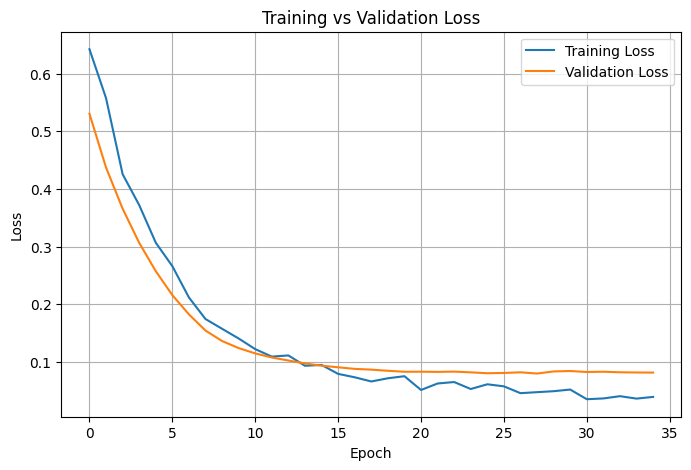

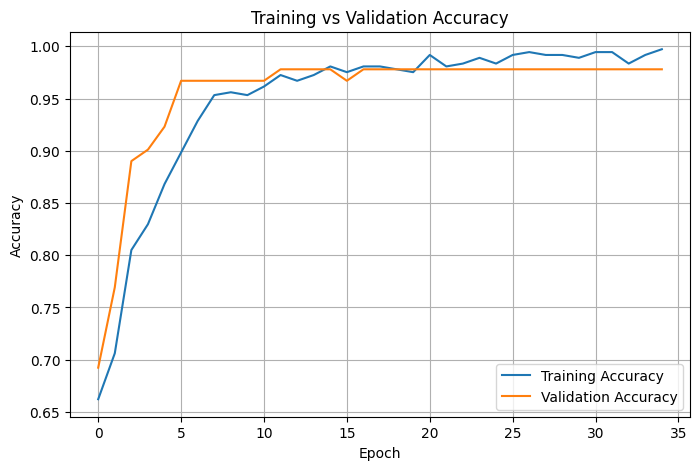

In [32]:
# ==============================================================================
# 5. Visualisasi Learning Curve (Loss & Accuracy)
# ==============================================================================

history_df = pd.DataFrame(history.history)

# Plot Loss
plt.figure(figsize=(8,5))
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Accuracy
plt.figure(figsize=(8,5))
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


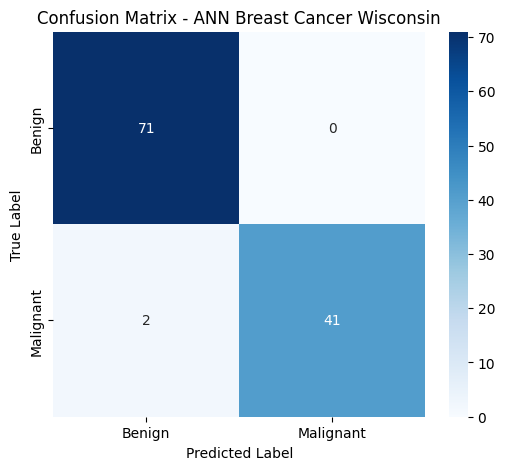

In [33]:
# ==============================================================================
# Visualisasi Confusion Matrix (Heatmap seperti modul)
# ==============================================================================

import seaborn as sns

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Benign', 'Malignant'],
    yticklabels=['Benign', 'Malignant']
)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - ANN Breast Cancer Wisconsin')
plt.show()


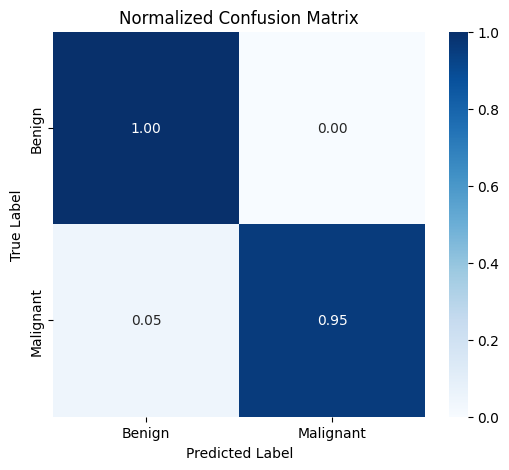

In [34]:
# Confusion Matrix Normalized
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(6,5))
sns.heatmap(
    cm_norm,
    annot=True,
    fmt='.2f',
    cmap='Blues',
    xticklabels=['Benign', 'Malignant'],
    yticklabels=['Benign', 'Malignant']
)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix')
plt.show()


In [35]:
# ==============================================================================
# 6. Evaluasi Akhir
# ==============================================================================
print("\nLangkah 6: Evaluasi Akhir Model pada Test Set")

# Prediksi pada Test Set
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int) 

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Classification Report
report = classification_report(y_test, y_pred, target_names=['Benign (0)', 'Malignant (1)'])
print("\nClassification Report:")
print(report)


Langkah 6: Evaluasi Akhir Model pada Test Set
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

Confusion Matrix:
[[71  0]
 [ 2 41]]

Classification Report:
               precision    recall  f1-score   support

   Benign (0)       0.97      1.00      0.99        71
Malignant (1)       1.00      0.95      0.98        43

     accuracy                           0.98       114
    macro avg       0.99      0.98      0.98       114
 weighted avg       0.98      0.98      0.98       114



In [37]:
# ==============================================================================
# MENYIMPAN MODEL ANN, SCALER, DAN LABEL ENCODER
# ==============================================================================

import joblib

# 1. Simpan Model ANN
model.save("ann_breast_cancer_model.h5")
print("✅ Model ANN berhasil disimpan: ann_breast_cancer_model.h5")

# 2. Simpan StandardScaler
joblib.dump(scaler, "scaler_breast_cancer.pkl")
print("✅ Scaler berhasil disimpan: scaler_breast_cancer.pkl")

# 3. Simpan Label Encoder (opsional tapi direkomendasikan)
joblib.dump(label_encoder, "label_encoder.pkl")
print("✅ Label Encoder berhasil disimpan: label_encoder.pkl")


✅ Model ANN berhasil disimpan: ann_breast_cancer_model.h5
✅ Scaler berhasil disimpan: scaler_breast_cancer.pkl
✅ Label Encoder berhasil disimpan: label_encoder.pkl
